# 4 积分

问题: 求函数定积分数值解 (数值积分, quadrature / numerical integral) $\int_a^b f(x)dx$. 先假定 $f$ 连续. 

或根据已知的若干函数值 $(x_0,f(x_0)),(x_1,f(x_1)),\dotsc,(x_n,f(x_n))$ 估计定积分.

<br>

假设存在多项式 $p(x)$ 近似: $f(x)\approx p(x)$ 则可以用多项式的积分估计 $f$ 的积分:
$$\left|\int_a^b f(x)dx - \int_a^b p(x)dx\right|\leqslant \int_a^b |f(x) - p(x)|dx$$

## Newton-Cotes 
给定 $n+1$ 个点函数值 $(x_i,y_i)$ 且为**等距节点**: $x_k =a + \frac{b-a}{n}k$. 若采用 Lagrange 插值:
$$p_n(x) = \sum_{k=0}^n y_k \prod_{j\neq k}\frac{x -x_j}{x_k - x_j}$$
则显然 $p_n(x)$ 的积分是 $y_i$ 的线性组合, 称为 Newton-Cotes 公式
$$I_n  = \int_a^b p_n(x)dx = (b-a)\sum_{k=0}^nc_k^ny_k$$
其中系数 $c_k^n$ 由下式给出
$$c_k^n = \frac{1}{b-a}\int_a^b \prod_{j\neq k}\frac{x -x_j}{x_k - x_j}dx$$

可以证明 $\sum_{k=0}^n c_k^n = 1$ 以及 $c_k^n = c_{n-k}^n$.

#### 特例

令 $h = x_1 - x_0 = \frac{b-a}{n}$.

0. 中点公式 (midpoint rule) 是 Newton-Cotes 中 $n=0$ 的 (退化) 情形, 几何意义上是用中点处矩形估计定积分:
$$I_0 = (b-a)f\left(\frac{a+b}{2}\right)$$

1. 梯形公式 (trapezoidal rule) 是 Newton-Cotes 中 $n=1$ 的情形, 几何意义上是用两端点构成直角梯形估计定积分:
$$I_1 = h\frac{f(a)+f(b)}{2}$$

2. Simpson's rule 是 Newton-Cotes 中 $n=2$ 的情形:
$$I_2 =\frac 13h\left(f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right)$$

3. Simpson's 3/8 rule 是 Newton-Cotes 中 $n=3$ 的情形:
$$I_3 =\frac 38h\left(f(a)+3f\left(\frac{2a+b}{3}\right)+3f\left(\frac{a+2b}{3}\right)+f(b)\right)$$

4. Boole's rule 是 Newton-Cotes 中 $n=4$ 的情形:
$$I_4 =\frac {2}{45}h\left(7f(a)+32f\left(\frac{3a+b}{4}\right)+
12f\left(\frac{a+b}{2}\right)+32f\left(\frac{a+3b}{4}\right)+7f(b)\right)$$

当 $n\geqslant 8$, 系数 $c_k^n$ 中会出现负数, 使用较小. (如果系数都是正数则属于凸组合, 误差受到限制, 但负数不然.) 

注: $n$ 增大不能严格表明更精确, 如可以证明对于凸函数, 中点公式比梯形公式误差小.

### 代数精度

如果一个定积分估计方法 (quadrature rule) 满足 $\int_a^b f(x)dx = \sum_{k=0}^n c_kf(x_k)$ 对所有不超过 $n$ 次多项式成立, 且不总对于 $n+1$ 次多项式成立, 则称该方法有代数精度 (degree of exactness) $n$.

如果一个使用 $n+1$ 个点的定积分方法有至少 $n$ 次的代数精度, 则称其是插值型的 (interpolatory).

例如: 梯形公式对于一次函数是取等号的, 故梯形公式代数精度是 $1$.

<br>

Newton-Cotes 就是插值型的积分方法. 可以证明当 $n$ 为偶数, $n+1$ 个点的 Newton-Cotes 代数精度是 $n+1$. (但 $n$ 为奇数时 $n+1$ 个点的代数精度是 $n$)

In [43]:
# Simpson's rule has 3 degrees of exactness 
f = lambda x: x**3
def Simpson(f, a, b):
    # estimate integral of f(x) on [a,b] using Simpson's rule 
    h = (b - a) * .5 
    return h / 3 * (f(a) + 4 * f((a+b)/2) + f(b))
print(Simpson(f, 0, 1)) # (integrate x^3 from 0 to 1) == 0.25

0.25


## 复化积分公式

复化积分公式 (composite trapezoidal rule) 即分段使用 Newton-Cotes 积分.

#### 特例

1. 复化梯形公式: 令 $h = x_1 - x_0 = \frac{b-a}{n}$.
$$ T_n= \frac 12h(y_0+2y_1+2y_2+\dotsc+2y_{n-1}+y_n)$$

2. 复化 Simpson 公式: 令 $h = x_1 - x_0 = \frac{b-a}{2n}$.
$$ S_n= \frac 13h(y_0+4y_1+2y_2+4y_3+2y_4+\dotsc+2y_{2n-2}+4y_{2n-1}+y_{2n})$$

可以证明两者有关系式: $S_n = \frac13(4T_{2n} - T_n)$.

In [35]:
# https://tieba.baidu.com/p/7832260466 
def Composite_Simpson(f, a, b, n):
    # compute the integral of f(x) on interval [a,b] with (2n+1) nodes by composite Simpson's rule
    s = - f(a) - f(b)
    h = (b - a) / (2 * n)
    for i in range(2*n + 1):
        s += f(a + i * h) * (4 if i%2 == 1 else 2)
    return s * h / 3

f = lambda x: 2*(1-x)**0.5 *((9*x*x-2*x+2)*(2-x)**0.5+(3*x**3-x*x+2*x-4)/2/(2-x)**0.5)/(2-x)
print('%.6f'%(Composite_Simpson(f, 0, 1, 10000) - 4 * 2**0.5))

-2.981267


#### 欧拉-麦克劳林公式

复化梯形公式的误差由欧拉-麦克劳林公式 (Euler-Maclaurin formula) 给出:
$$T_n = I+\sum_{k=1}^n\frac{B_{2k}}{(2k)!}h^{2k}\left(f^{2k}(b) - f^{2k}(a)\right)+O(h^{2n+2})$$

#### 理查德森外推法

理查德森外推法 (Richardson extrapolation) 假设用 $F(h) = I+O(h)$ 估计积分 $I$, 其中 $h = x_1 - x_0 = \frac{b-a}{n}\rightarrow 0$. 设
$$F(h) = I+\sum_{k=0}^{\infty}c_kh^{m+k}$$
则通过
$$\frac{r^mF(h) - F(rh)}{r^m - 1} = I+\sum_{k=0}^{\infty}\widetilde{c_k}h^{m+k+1}$$
可以得到更高次余项的估计. 可见 复化 Simpson 公式 就是通过 复化梯形公式 外推得出.


#### Romberg 算法

可以进行如下结构的积分外推
$$\begin{matrix}
    I_{00}     &   &  &  & & & \\ 
    \downarrow & \searrow & & & & & \\ 
    I_{10} & \rightarrow & I_{11} & & & & \\
    \downarrow & \searrow  & \downarrow & \searrow& & & \\
    I_{20} & \rightarrow & I_{21} &\rightarrow & I_{22} & & \\
    \downarrow & \searrow  & \downarrow & \searrow& \downarrow & \searrow & \\
    \cdots  & \rightarrow & \cdots &\rightarrow &\cdots & \rightarrow & \cdots\\
\end{matrix}$$

其中有递推公式 
$$I_{i,j+1} = \frac{4^{j+1} I_{i,j} - I_{i-1,j}}{4^{j+1} - 1}$$
而 $I_{i,0}$ 是 含有 $2^i$ 个区间的复化梯形公式, 具有递推
$$I_{i+1,0} = \frac 12I_{i,0} 
+ h_{i+1}\sum_{k=0}^{2^i-1} f\left(a+(2k+1)h_{i+1}\right)$$
其中区间长度 $h_{i+1}= (b-a)\cdot 2^{-(i+1)}$ 及初始值 $I_{0,0} = (b-a)\left(f(a)+f(b)\right)/2$.

#### 周期函数

周期函数可以用复化梯形公式逼近, 且误差指数收敛.

In [84]:
import numpy as np
def Romberg(f, a, b, tol = 1e-6, maxiter = 20):
    # compute the integral of f(x) over [a,b] by Romberg 
    n = maxiter
    I = np.zeros((n,n))
    I[0,0] = (b - a) * (f(a) + f(b)) / 2. 
    h = b - a
    for i in range(1, n):
        h *= .5
        I[i,0] = I[i-1,0] / 2. + h * sum(f(a + t*h) for t in range(1, 2**i, 2))
        for j in range(i):
            I[i,j+1] = (4**(j+1) * I[i,j] - I[i-1,j]) / (4**(j+1) - 1)
        if n > 2 and abs(I[i,i] - I[i-1,i-1]) < tol: # diagonals
            break 
    #print(I[:i+1,:i+1])
    print('History =', I[:i+1,:i+1].flat[::i+2]) # diagonals
    return I[i,i] if i < n else I[-1,-1]

# https://tieba.baidu.com/p/7832260466 
f = lambda x: 2*(1-x)**0.5 *((9*x*x-2*x+2)*(2-x)**0.5+(3*x**3-x*x+2*x-4)/2/(2-x)**0.5)/(2-x)
Romberg(f, 0, 1, tol = 1e-6) - 4 * 2**0.5

History = [0.70710678 1.99982808 2.49577089 2.6177472  2.65580617 2.66868826
 2.6731631  2.67473272 2.6752856  2.67548071 2.67554963 2.67557399
 2.6755826  2.67558564 2.67558672 2.6755871 ]


-2.981267152057031

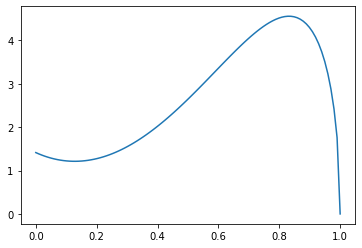

In [85]:
from matplotlib import pyplot as plt 
plt.plot(np.linspace(0,1,100),[f(i) for i in np.linspace(0,1,100)])

## Gauss 积分法

Gauss 积分法 (Gauss quadrature) 是区间上 $n+1$ 个点有 $2n+1$ 次代数精度的估计. 事实上, 这是最高的, 可以证明不能达到 $2n+2$ 次代数精度: 

证: 假设 $n+1$ 个点是 $x_0,\dotsc,x_n$ 以及积分估计方法
$$I\approx \sum_{k=0}^n a_k f(x_k).$$

特别地, 取 $f(x)=\prod_{k=0}^n (x - x_k)^2$ 是 $2n+2$ 次函数且显然 $I\neq 0$ 故不可能取等. 因此代数精度不可能达到 $2n+2$.

下面指出达到 $2n+1$ 次代数精度的方法.

### 正交多项式

根据牛顿插值法的插值余项, $\forall x\in [a,b]$,
$$f(x) - p_{n+1}(x) = f[x_0,x_2,\dotsc,x_n,x]\prod_{j=0}^n (x - x_j)$$
其中 $p_{n+1}(x)$ 为 $f(x)$ 在 $x_0,\dotsc,x_n$ 的插值多项式.


特别地, 如果 $f(x)$ 是多项式, 且次数不超过 $2n+1$, 则差商 $f[x_0,x_2,\dotsc,x_n,x]$ 也是多项式, 且次数不超过 $n$. 注意
$$\int_a^b \left(f(x) - p_{n+1}(x)\right)dx =\int_a^b f[x_0,x_2,\dotsc,x_n,x]\prod_{j=0}^n (x - x_j)dx$$

若, $\prod_{j=0}^n (x - x_j)dx$ 是某一组权重为 $1$ 的正交多项式中的 $n+1$ 次多项式, 由于 $f[x_0,x_2,\dotsc,x_n,x]$ 是不超过 $n$ 次正交多项式的线性组合, 故上式积分等于 $0$. 即, 取 $x_j$ 为 $[a,b]$ 上 $n+1$ 次权重为 $1$ 的正交多项式 (即仿射的 Legendre 多项式) 的所有零点即可.

### 权重推广

更一般地, 可以尝试其他权重对应的高斯积分法, 只需在以上过程中选取相应权重的正交多项式
$$\int_a^b f(x)dx=\int_a^b \rho(x)\left(\frac{f(x)}{\rho(x)}\right)dx\approx \sum_{k=0}^n a_k \frac{f(x_k)}{\rho(x_k)}$$



### 误差估计

只要 $f$ 连续, 当 $n\rightarrow \infty$ 时高斯积分法收敛. 定量地, 若 $f$ 充分光滑则 $({\rm deg\ }p_n = n)$
$$|\int_a^b \left(f(x) - p_{n}(x)\right)dx|=\frac{|f^{2(n+1)}(\xi)|}{(2n+2)!}\int_a^b\rho(x)\prod_{k=0}^n (x-x_k)^2dx$$

### 系数

若使用高斯积分法 $\int_a^b \rho(x)f(x)dx\approx \sum_{k=0}^n a_kf(x_k)$, 设 $\{p_k(x)\}_{k\geqslant 0}$ 是 $[a,b]$ 上以 $\rho(x)$ 为权重的<font color=red>标准正交</font>多项式, 那么 $x_k$ 是 $p_{n+1}(x)$ 的所有零点且 $a_k$ 由下式给出
$$a_k = \frac{\overline{p_0(x_k)}}{\sum_{j=1}^n|p_j(x_k)|^2}=
\frac{|p_0(x_k)|^2}{\sum_{j=1}^n|p_j(x_k)|^2}\int_a^b\rho(x)dx$$

证: 设 $\int_a^b\rho(x)f(x)dx = \sum_{k=0}^n a_kf(x_k) $ 对于不超过 $2n+1$ 次的多项式 $f$ 成立, 于是代入 $f(x) =p_i(x) \ (0\leqslant i\leqslant n)$ 注意 $\int_a^b\rho(x)p_i(x)dx = \left\{\begin{array}{ll} 1 & i = 0\\ 0 & i >0\end{array}\right.$, 

$$\left[\begin{matrix}p_0(x_0) & p_0(x_1) & \dotsc & p_0(x_n) \\ 
p_1(x_0) & p_1(x_1) & \dotsc & p_1(x_n)\\
\vdots & \vdots & \ddots & \vdots \\
p_n(x_0) & p_1(x_1) & \dotsc & p_n(x_n)
 \end{matrix}\right]\left[\begin{matrix}a_0 \\ a_1\\\vdots \\ a_n\end{matrix}\right]
= \left[\begin{matrix}1 \\ 0\\\vdots \\ 0\end{matrix}\right]$$
即 $Pa=e$. 

再回忆如下标准正交多项式的如下递推矩阵所有特征向量构成 $P$
$$T=\left[\begin{matrix}\alpha_0 &\beta_0 & & & & \\ 
 \overline{\beta_0} & \alpha_1 &  \beta_1 & & & \\
 &\overline{\beta_1} & \alpha_2 & \ddots & & \\  
 & & \ddots & \ddots &  \beta_{n-2}& \\ 
 & & &\overline{\beta_{n-2}} & \alpha_{n-1} & \beta_{n-1}\\
 & & & &  \overline{\beta_{n-1}} & \alpha_{n} 
\end{matrix}\right]$$
设标准特征向量构成矩阵 $Q$, 其可以表为对 $P$ 列标准化: $Q = P{\rm diag}[r_0,\dotsc,r_n] = PR$, 其中 $r_k = \Vert [p_0(x_k),\dotsc,p_n(x_k)]\Vert^{-1}$. 

$$a = P^{-1}e = RQ^{-1}e=RQ^*e$$

展开之并最后注意 $p_0(x_k)$ 为常数, $p_0(x_k)\cdot \int_a^b\rho(x)dx=1$, 
$$a_k = \frac{\overline{p_0(x_k)}}{\sum_{j=1}^n|p_j(x_k)|^2}=
\frac{|p_0(x_k)|^2}{\sum_{j=1}^n|p_j(x_k)|^2}\int_a^b\rho(x)dx$$

注: 由此可见, $a_k$ 是该标准特征向量的第一个元素模长平方乘 $\int_a^b\rho(x)dx$. 且系数均为正数误差比较小.

### 矩阵函数

记标准正交多项式的如下递推矩阵为 $T$, 且设其谱分解 $T=Q^*DQ$
$$T=\left[\begin{matrix}\alpha_0 &\beta_0 & & & & \\ 
 \overline{\beta_0} & \alpha_1 &  \beta_1 & & & \\
 &\overline{\beta_1} & \alpha_2 & \ddots & & \\  
 & & \ddots & \ddots &  \beta_{n-2}& \\ 
 & & &\overline{\beta_{n-2}} & \alpha_{n-1} & \beta_{n-1}\\
 & & & &  \overline{\beta_{n-1}} & \alpha_{n} 
\end{matrix}\right]$$

则 $Q$ 为标准特征向量构成的矩阵, 对角阵 $D={\rm diag}[x_0,\dotsc,x_n]$. 
再设 $e_1 = [1,0,0,\dotsc,0]^T$, 则 $Qe$ 表示每个标准特征向量的第一个元素. 于是, 高斯积分法可以写成
$$I\approx \sum_{k=0}^n a_kf(x_k) = \sum_{k=0}^n |(Qe_1)_k|^2f(x_k) =e_1^*Q^*f(D)Qe_1=e_1^*f(T)e_1$$




### Generalized Average Gauss Quadrature

取 $\widetilde T$ 如下

$$\widetilde T = \left[\begin{matrix}\alpha_0 &\beta_0 & & & & & & & & & & & \\ 
 \overline{\beta_0} & \alpha_1 &  \beta_1 & & &  & & & & & & & \\
 &\overline{\beta_1} & \alpha_2 & \ddots & &  & & & & & & &  \\  
 & & \ddots & \ddots &  \beta_{n-2}&  & & & & &  & & \\ 
 & & &\overline{\beta_{n-2}} & \alpha_{n-1} & \beta_{n-1} & & & & & &  & \\
 & & & &  \overline{\beta_{n-1}} & \alpha_{n}  &\beta_n & & & & & &  \\
  & & & & & \overline{\beta_n} & \alpha_{n-1}& \beta_{n-2}  & & & & &  \\ 
  & & & & & &  \overline{\beta_{n-2}}&\alpha_{n-2}& \beta_{n-3}   & & &  & \\ 
  & & & & &    &  &\overline{\beta_{n-2}} &\alpha_{n-3}   & \ddots& & \\ 
  & & & & & &  & &\ddots & \ddots   & \beta_1& &   \\ 
  & & & & & & & & &\overline{\beta_1} & \alpha_1 &\beta_0 \\ 
  & & & & & & & & & & \overline{\beta_0} &\alpha_0
\end{matrix}\right]$$

则计算 $e_1^*f(\widetilde T)e_1$ 比直接计算 $e_1^*f(T)e_1$ 更加精确.

## 其它积分

### 不连续函数

不连续函数应该分段计算.

### 反常积分

反常积分可以有多种办法:
1. 取极限
2. 先进行变量代换化简
3. 采用权重函数

### 振荡积分

振荡积分是包含 $\sin x,\cos x,e^{ix}$ 等的积分, 如 $\int_a^b f(x) \sin (\omega x)dx$, 若直接计算常常会出现周期相消的情况. 

可以将振荡项 $\sin x$ 等作为权重.

### 高维积分

高维积分有如下方法

1. 分成四边形或三角形网格, 采用正方形的复化梯形公式等
2. 使用高维 (以二维为主) 版本的积分公式, 如
$$\int_0^1\int_0^{1-y}f(x,y)dxdx\approx \frac16(f(\frac 23,\frac 16)+f(\frac16,\frac23)+f(\frac16,\frac16))$$
3. 先进行变量代换化简
4. 蒙特卡罗采样法: 随机取点, 用落在区域内点的数量来估计区域的体积.


In [21]:
# 蒙特卡罗采样法估计 sinx 在 [0, pi] 的积分 (注: 误差很大, 只适合估计量级)
# 即估计 y = sinx 与 x=0, y=0, x=pi 围成的区域面积
# 在 [0, pi] x [0, 1] 上随机取点, 计算落在目标区域中的点的数量
import numpy as np 
n = 50000
x = np.random.random(n) * np.pi
y = np.random.random(n)
m = np.sum(np.where(y <= np.sin(x), 1, 0))  # (x,y) 在 y = sinx 于 x轴 围成的区域 的数量
print(f'S = {m/n*np.pi}')

S = 2.002576821104278
